In this notebook, methods to blend input image with texture image will be illustrated. It will be using PaperFactory in an Augraphy augmentation pipeline to blend the image.

In [1]:
# Installation of Augraphy

!pip install git+https://github.com/sparkfish/augraphy


  Cloning https://github.com/sparkfish/augraphy to /tmp/pip-req-build-pwhyt9_t
  Running command git clone --filter=blob:none --quiet https://github.com/sparkfish/augraphy /tmp/pip-req-build-pwhyt9_t
  Resolved https://github.com/sparkfish/augraphy to commit 1f63992034b005065873808230efc28d5e1ff459
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for augraphy: filename=augraphy-8.2.4-py3-none-any.whl size=203366 sha256=d57c0668a7ebbda3231ac54cb6dad930105b606f6c432930402a3ecffaf6299f
  Stored in directory: /tmp/pip-ephem-wheel-cache-bh_ybhy2/wheels/36/d0/21/1aa9ab43fc6934decc10b8a3b839a472b0fed7d3d185b90d51
Successfully built augraphy


In [2]:
# Import libraries

from augraphy import *
import random
import numpy as np
import cv2
import gdown
import os
import zipfile
from glob import glob
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

### Blending existing paper texture with PaperFactory

By using an Augraphy pipeline, existing paper texture can be blended into document by using PaperFactory. The argument "texture_path" should be pointing to the path of image textures in order to use them in blending the paper. The argument "blend_method" can be used to blend image with different blending methods. Right now it supports 14 types of blending methods, such as "ink_to_paper", "min", "max", "mix", "normal", "lighten", "darken", "screen", "dodge", "multiply", "divide", "grain_merge", "overlay", and "FFT", where the default blending method is "ink_to_paper".

In [3]:
# download existing paper texture

id = "1114s61-GmHbhIn8f9YNz6OwS3CwkOsIp&authuser=0"
gdown.download(id=id, output="paper_textures.zip", quiet=True)

# extract the zip
with zipfile.ZipFile("paper_textures.zip", 'r') as zip_ref:
    zip_ref.extractall()

# fix the directory name
os.rename("paper textures", "paper_textures")

In [4]:
# download document images

id = "1BuQAGx31AiXD1dj0NvFZNyqhLS5sU9Dd&authuser=0"
gdown.download(id=id, output="imgs.zip", quiet=True)

# extract the zip
with zipfile.ZipFile("imgs.zip", 'r') as zip_ref:
    zip_ref.extractall()



In [5]:
# get path of documents

document_paths = glob("/content/imgs/*")

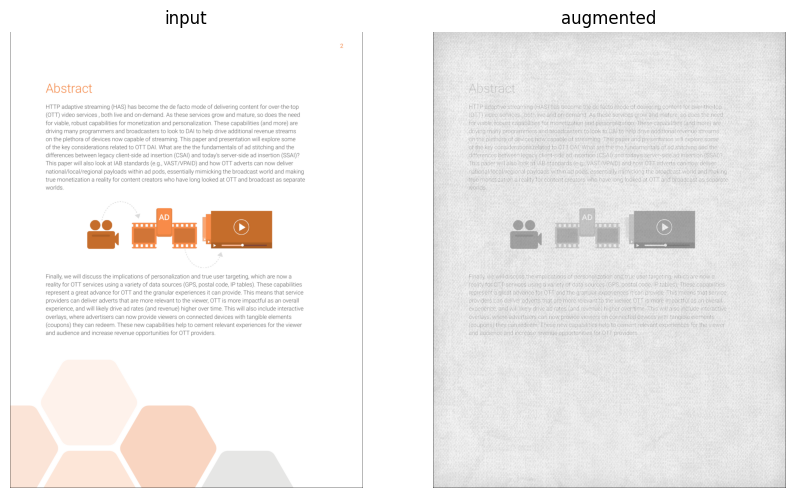

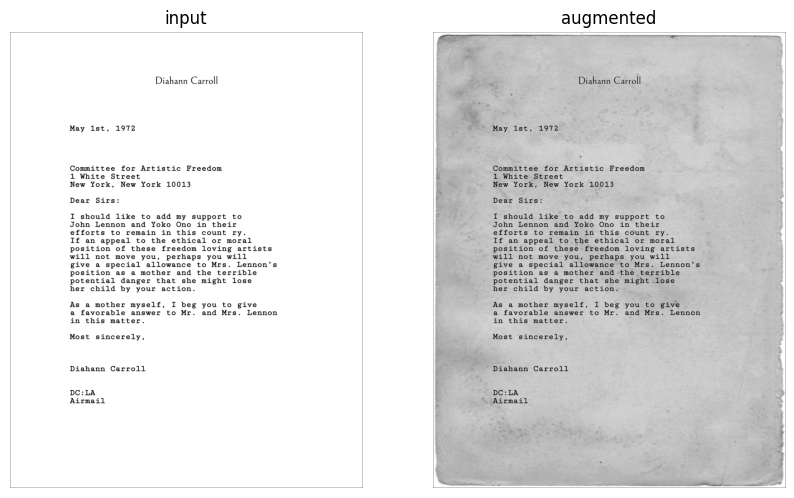

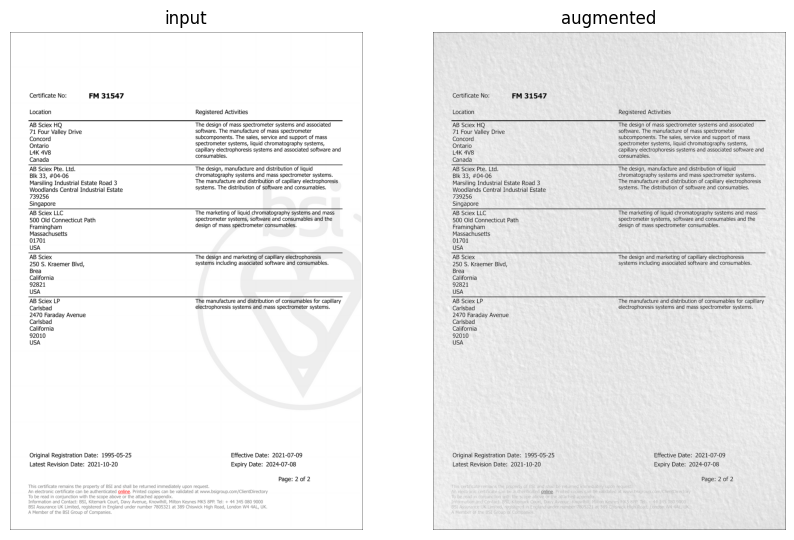

In [7]:
# overlay texture with PaperFactory using existing textures

texture_path = "/content/paper_textures/"
paperfactory = PaperFactory(texture_path=texture_path,
                            texture_enable_color=0,
                            blend_texture=0,
                            blend_method="ink_to_paper")
pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

for i in range(3):
  image = cv2.imread(document_paths[i])
  image_augmented = pipeline(image)

  # create borders
  ysize, xsize = image.shape[:2]
  image[0,:] = 0
  image[ysize-1,:] = 0
  image[:, 0] = 0
  image[:, xsize-1] = 0

  # create borders
  ysize, xsize = image_augmented.shape[:2]
  image_augmented[0,:] = 0
  image_augmented[ysize-1,:] = 0
  image_augmented[:, 0] = 0
  image_augmented[:, xsize-1] = 0

  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(image, cmap="gray")
  plt.title("input")
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image_augmented, cmap="gray")
  plt.title("augmented")
  plt.axis('off')


### Blending paper texture from TextureGenerator with PaperFactory

If the provided "texture_path" has no image or the flag of "generate_texture" is enabled, PaperFactory uses texture from TextureGenerator in blending the input image. The argument of "generate_texture_background_type" can be used to select the desired background texture and the argument of "generate_texture_edge_type" can be used to select the desired edge texture. Right now there are 10 different background textures, such as "normal", "strange", "rough_stains", "fine_stains", "severe_stains", "light_stains", "random_pattern", "dot_granular", "light_granular", and "rough_granular". For edge based texture, it has 2 different types of texture for now, which is "curvy_edge" and "broken_edge".

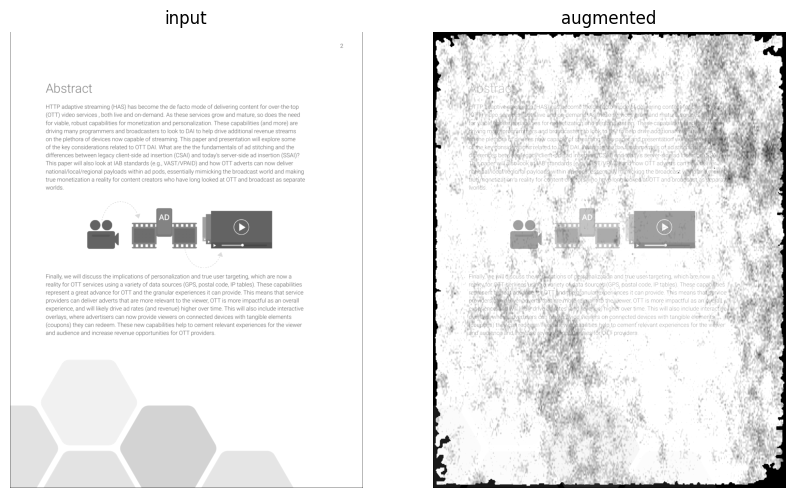

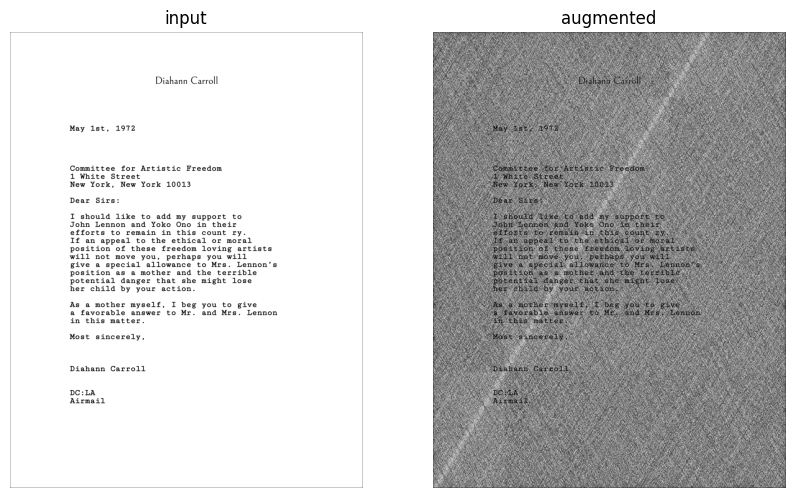

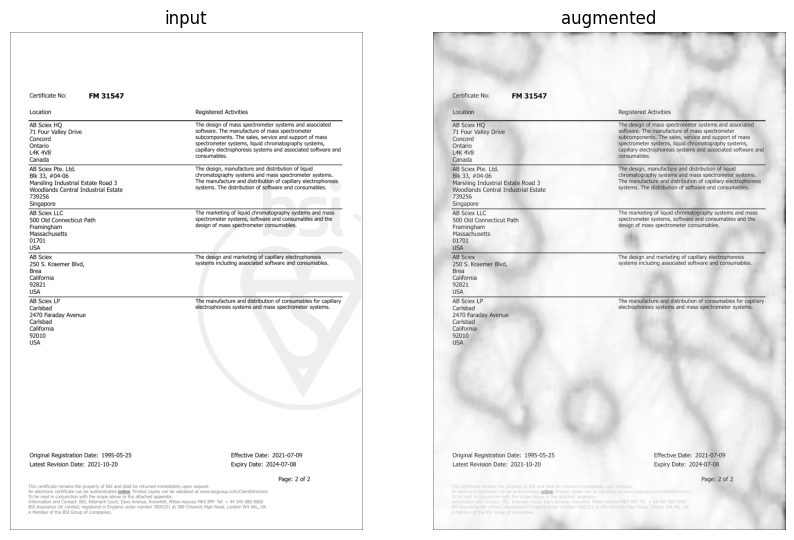

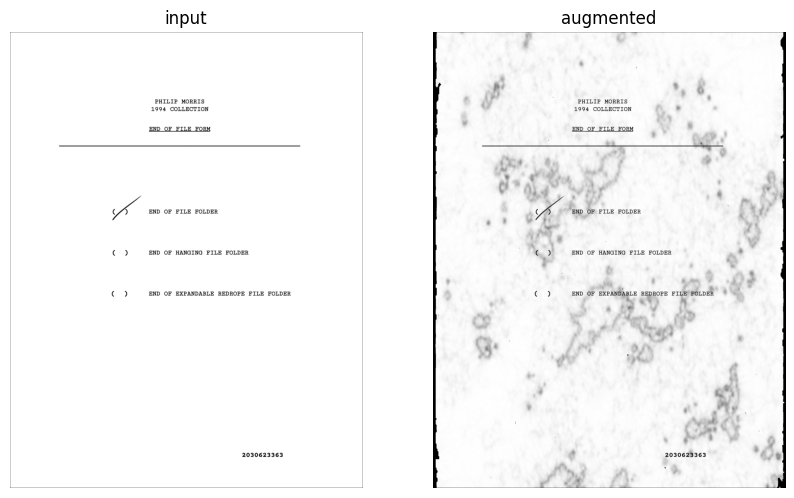

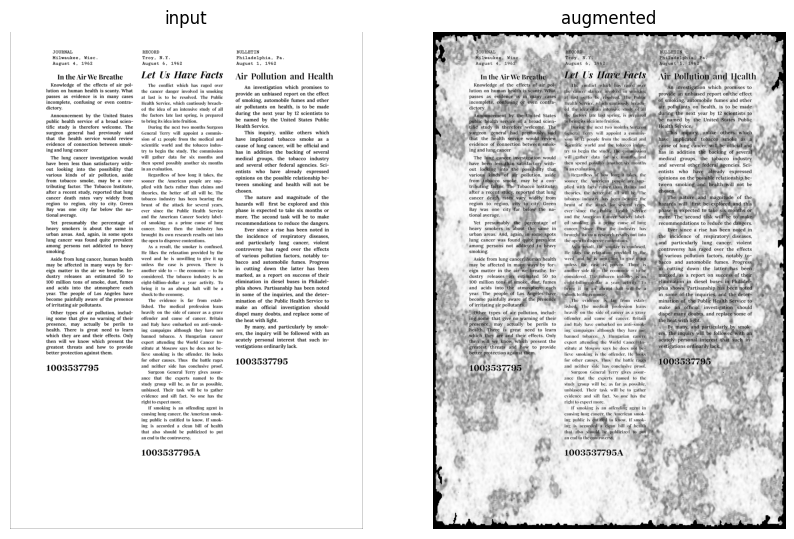

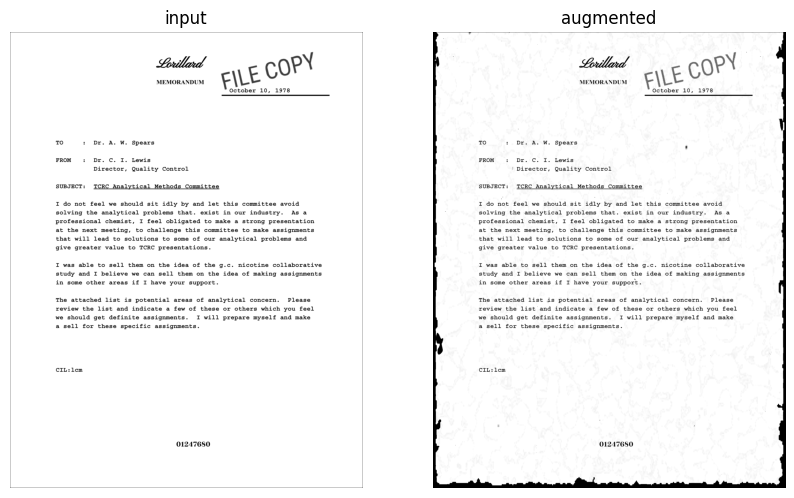

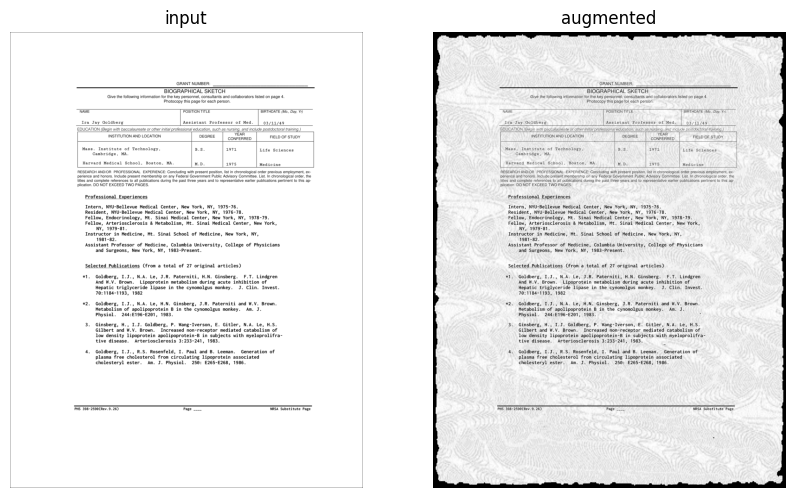

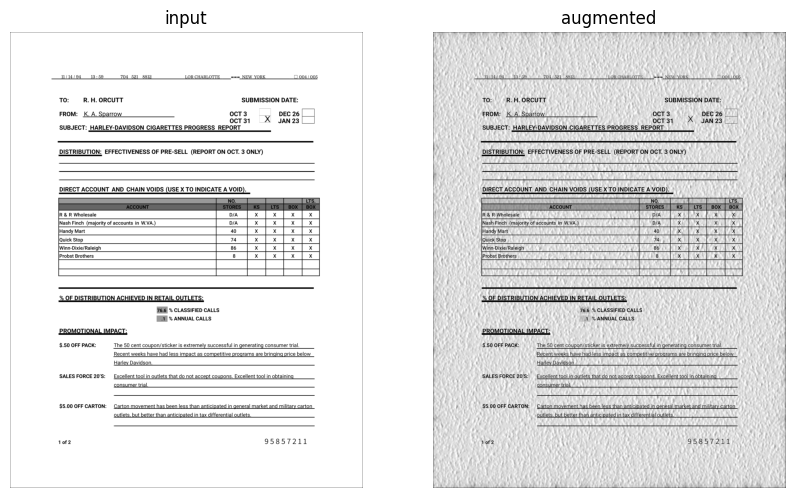

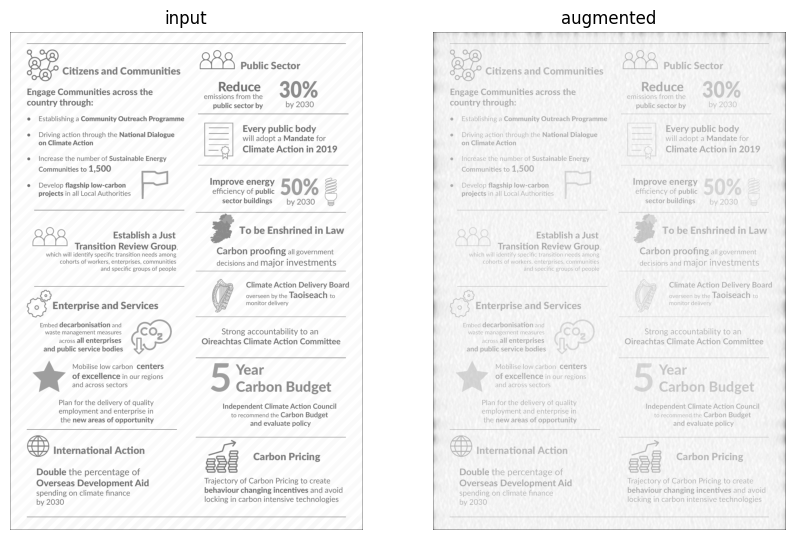

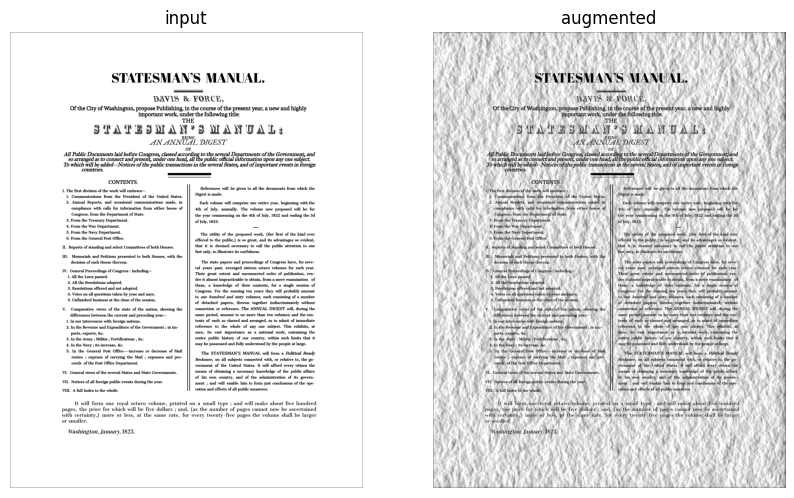

In [12]:
# overlay texture with PaperFactory using TextureGenerator

background_textures =  ["normal",
                        "strange",
                        "rough_stains",
                        "fine_stains",
                        "severe_stains",
                        "light_stains",
                        "random_pattern",
                        "dot_granular",
                        "light_granular",
                        "rough_granular"]

edge_textures = ["curvy_edge",
                 "broken_edge"]


for i, background_textures in enumerate(background_textures):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type=background_textures,
                                generate_texture_edge_type=random.choice(edge_textures),
                                texture_enable_color=0,
                                blend_texture=0,
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')